In [613]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Open file and process data into correct type:

In [614]:
raw_data = open("entropy_data.txt","r")
raw_data = raw_data.read().split(",")
# there is a blank value at the end therefore remove it
raw_data.pop()

processed_data = []
for i in range(len(raw_data)):
    processed_data.append(float(raw_data[i]))

Split data into 2 separate lists:

In [615]:
distance, entropy = [], []
for i in range(len(processed_data)):
    if i == 0 or i%2 == 0:
        entropy.append(processed_data[i])
    else:
        distance.append(processed_data[i])

Plot entropy against distance:

Text(0, 0.5, 'Entropy')

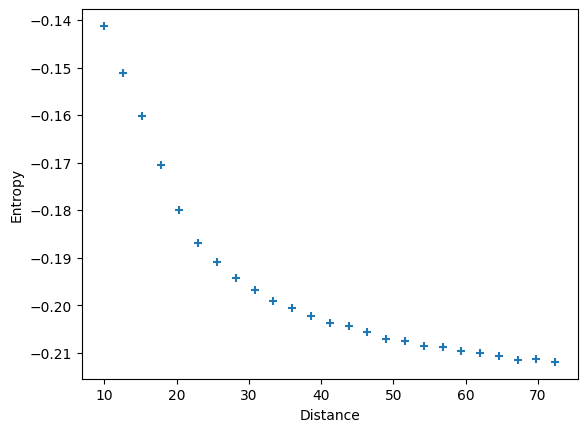

In [616]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")

Plot gradient against distance:

In [617]:
x_values,y_values = [],[]
for i in range(0,len(processed_data),2):
    x_values.append(processed_data[i+1])
    y_values.append(processed_data[i])

In [618]:
p = np.polyfit(x_values,y_values,3)
p

array([-7.57247033e-07,  1.21728725e-04, -6.59758878e-03, -8.71519651e-02])

Text(0, 0.5, 'Entropy')

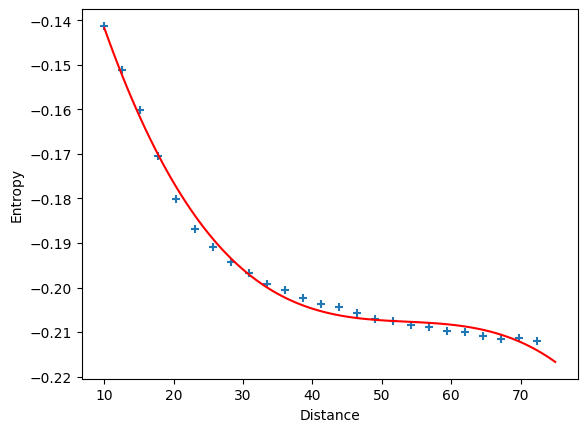

In [619]:
x = np.linspace(10,75,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")

In [620]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 0.70934756, -0.88587254, -0.22917086])

Text(0, 0.5, 'Entropy')

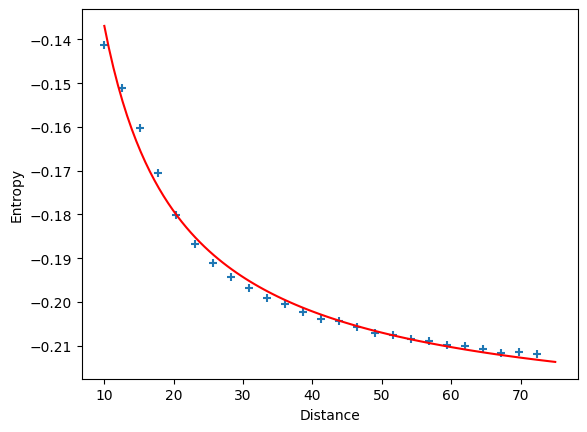

In [621]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")

Calculate gradient between points and graph

In [622]:
gradient_vals = []

for i in range(len(entropy)-1):
    dS = entropy[i+1] - entropy[i]
    dx = distance[i+1] - distance[i]
    x = distance[i] + dx/2
    gradient_vals.append((dS/dx,x))


Text(0, 0.5, 'dS/dx')

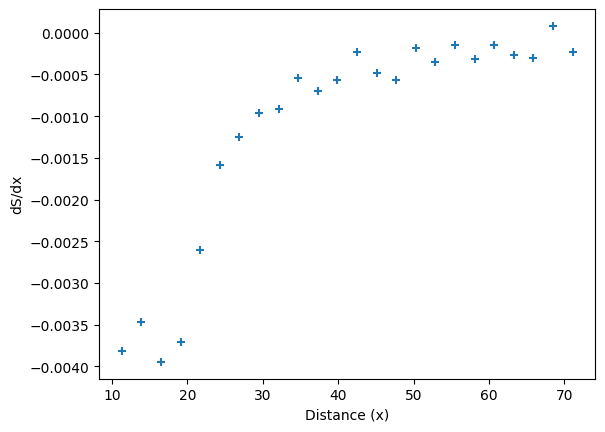

In [623]:
grad_xs, grad_ys = [],[]
for coord in gradient_vals:
    grad_ys.append(coord[0])
    grad_xs.append(coord[1])

plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")

[-0.0094106   0.00229942]


Text(0, 0.5, 'dS/dx')

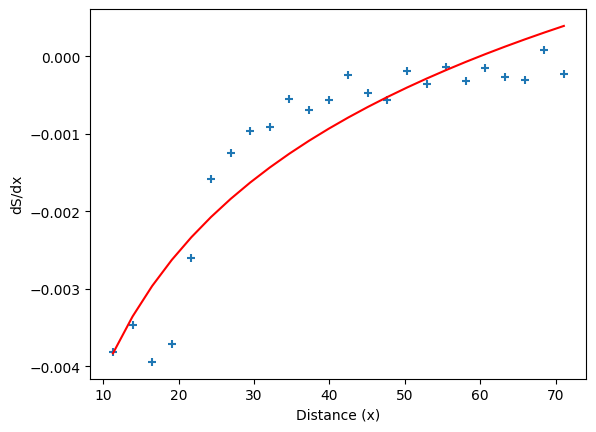

In [624]:
def f(x, a, b):
    return a + b * np.log(x)

p3 = scipy.optimize.curve_fit(f, xdata=grad_xs,ydata=grad_ys, p0=(0.00001,-0.005))

p3 = p3[0]
print(p3)
y3 = p3[1] * np.log(grad_xs) + p3[0]


plt.plot(grad_xs,y3,"red")
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")